In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from nltk import tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
columns = ['place_code','destination_code','date','review']
reviews = pd.read_csv('captured_reviews.csv',names=columns)

In [3]:
reviews.describe()

,place_code,destination_code,date,review
count,21668,21668,21668,12006
unique,9,12,35,11635
top,g147249,d215733,February 8 2016,This was the best beach...clear water and powd...
freq,6090,5170,5049,37


In [4]:
reviews = pd.read_csv('captured_reviews.csv',names=columns).dropna()

In [5]:
reviews.describe()

,place_code,destination_code,date,review
count,12006,12006,12006,12006
unique,9,12,35,11635
top,g147293,d215733,February 8 2016,It was the best beach in Grand Cayman; however...
freq,4029,4029,3190,37


In [6]:
reviews['date'].describe()

count               12006
unique                 35
top       February 8 2016
freq                 3190
Name: date, dtype: object

In [7]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [8]:
sid = SentimentIntensityAnalyzer()

In [10]:
def get_score(reviewText):
    reviews_list = tokenize.sent_tokenize( unicode(reviewText, 'utf-8') )
    review_score=[]
    for review in reviews_list:
        scores = sid.polarity_scores(review)
        review_score.append(scores['compound'])
    return np.mean(review_score)

In [46]:
def format_scores(reviewText):
    reviews_list = tokenize.sent_tokenize( unicode(reviewText, 'utf-8') )
    review_scores=[]
    for review in reviews_list:
        scores = sid.polarity_scores(review)
        review_scores.append([review,scores])
    return review_scores

In [12]:
for reviewText in reviews['review'].iloc[:100]:
    reviews_list = tokenize.sent_tokenize( unicode(reviewText, 'utf-8') )
    print("Next Review\n")
    for review in reviews_list:
        scores = sid.polarity_scores(review)
        print(("{0}\n{1}").format(review, scores))

Next Review

Great beach very nice clear water.
{'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compound': 0.8771}
The fact that the water is shallow makes it also great for children.
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.6249}
This is one which i do recommend others to visit.
{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}
Next Review

I love this beach because the water was the warmest anywhere on the island that we found.
{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.7845}
We did a lot snorkeling there as well.
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.2732}
Beautiful fish.
{'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'compound': 0.5994}
There are also areas of shade an event someone didn't want to spend all day in the Sun.
{'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'compound': -0.0572}
Next Review

This was my favorite beach in Aruba.
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}
The waves are big but not dangerous.
{'neg': 0.0, 'n

In [12]:
reviews['mean_sentiment_score'] = scored_reviews

""


In [13]:
reviews.head(30)

,place_code,destination_code,date,review,mean_sentiment_score
1,g147249,d148915,2016-02-28,Great beach very nice clear water. The fact th...,0.621067
2,g147249,d148915,2016-02-27,I love this beach because the water was the wa...,0.399975
3,g147249,d148915,2016-02-25,This was my favorite beach in Aruba. The waves...,0.194900
4,g147249,d148915,2016-02-25,much better beach then where the hotels are. W...,0.118033
5,g147249,d148915,2016-02-25,This looks like a good beach to snorkel. We di...,0.061000
9,g147249,d148915,2016-02-21,This was the most beautiful calm water white s...,0.520267
10,g147249,d148915,2016-02-19,Its a drive from a hotel zone but definitely w...,0.308880
12,g147249,d148915,2016-02-19,I loved that beach we arrived very early like ...,0.628650
13,g147249,d148915,2016-02-19,This beach is breath taking. The water is gorg...,0.288350
14,g147249,d148915,2016-02-19,Easy to get to just north of the high rises. G...,0.505900


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12006 entries, 1 to 21666
Data columns (total 5 columns):
place_code              12006 non-null object
destination_code        12006 non-null object
date                    12006 non-null datetime64[ns]
review                  12006 non-null object
mean_sentiment_score    12006 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 562.8+ KB


In [18]:
reviews['date'].unique()

array(['2016-02-27T19:00:00.000000000-0500',
       '2016-02-26T19:00:00.000000000-0500',
       '2016-02-24T19:00:00.000000000-0500',
       '2016-02-20T19:00:00.000000000-0500',
       '2016-02-18T19:00:00.000000000-0500',
       '2016-02-17T19:00:00.000000000-0500',
       '2016-02-16T19:00:00.000000000-0500',
       '2016-02-15T19:00:00.000000000-0500',
       '2016-02-14T19:00:00.000000000-0500',
       '2016-02-13T19:00:00.000000000-0500',
       '2016-02-11T19:00:00.000000000-0500',
       '2016-02-07T19:00:00.000000000-0500',
       '2016-03-12T19:00:00.000000000-0500',
       '2016-03-09T19:00:00.000000000-0500',
       '2016-03-08T19:00:00.000000000-0500',
       '2016-03-07T19:00:00.000000000-0500',
       '2016-02-10T19:00:00.000000000-0500',
       '2016-02-09T19:00:00.000000000-0500',
       '2016-02-08T19:00:00.000000000-0500',
       '2016-03-06T19:00:00.000000000-0500',
       '2016-03-05T19:00:00.000000000-0500',
       '2016-03-04T19:00:00.000000000-0500',
       '20

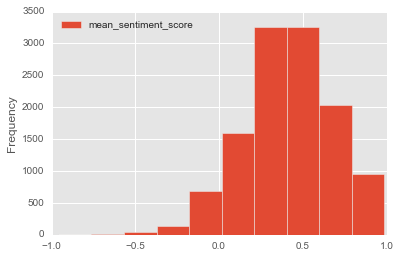

In [19]:
reviews.plot(kind='hist',y='mean_sentiment_score');

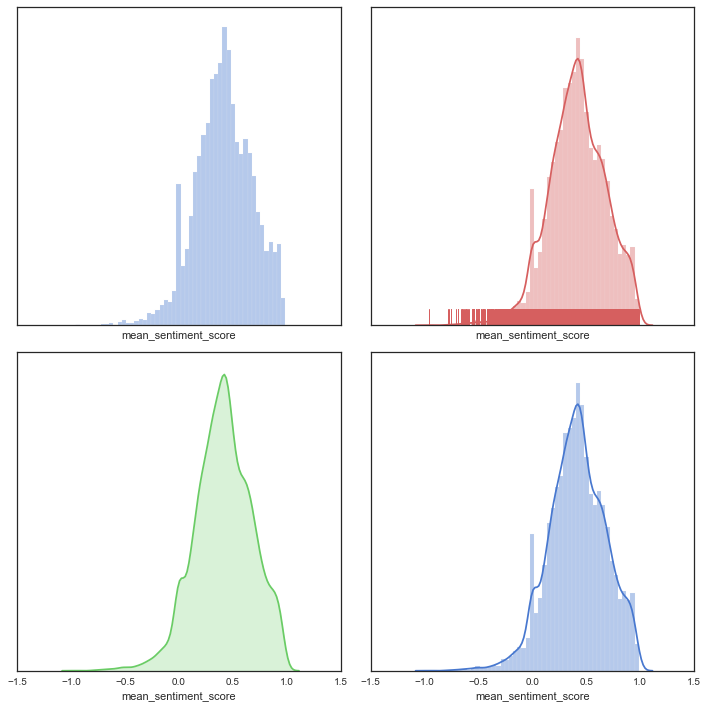

In [23]:
d = reviews.loc[:,'mean_sentiment_score']
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
#sns.despine(left=True)
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
sns.distplot(d, rug=True, color="r", ax=axes[0, 1])
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(d, color="b", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

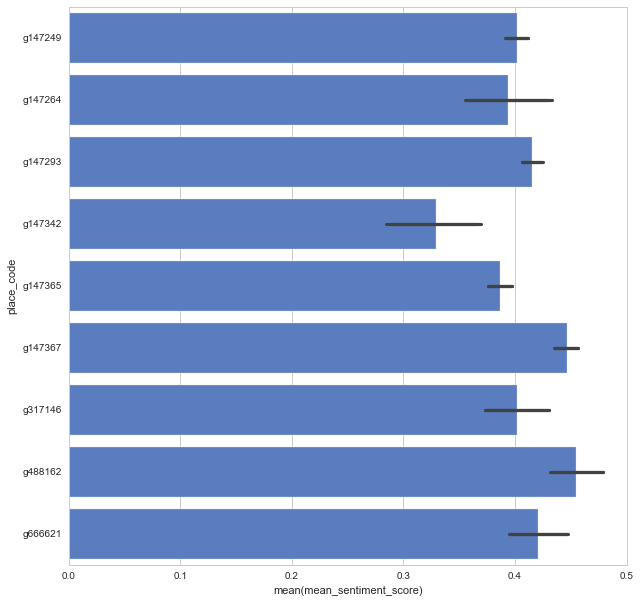

In [158]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.set_color_codes("pastel")
sns.barplot(x="mean_sentiment_score", y="place_code", data=reviews,
            label="Total", color="b");

sns.set_color_codes("muted")
sns.barplot(x="mean_sentiment_score", y="place_code", data=reviews,
            label="Alcohol-involved", color="b");

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",xlabel="Automobile collisions per billion miles")
#sns.despine(left=True, bottom=True)

In [43]:
date_groups = reviews.groupby('date').agg({'mean_sentiment_score': np.mean})

In [52]:
date_groups.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2016-02-08 to 2016-03-13
Data columns (total 1 columns):
mean_sentiment_score    35 non-null float64
dtypes: float64(1)
memory usage: 560.0 bytes


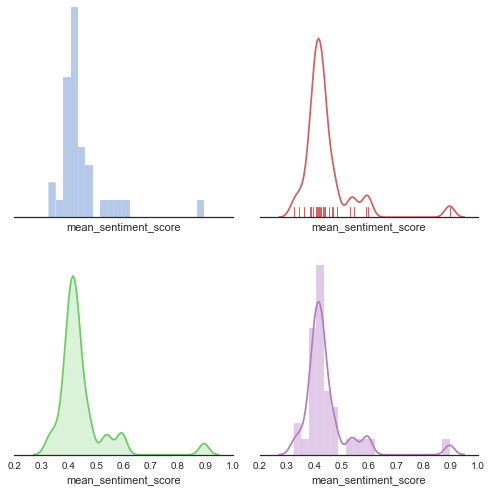

In [147]:
d = date_groups.loc[:,'mean_sentiment_score']
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

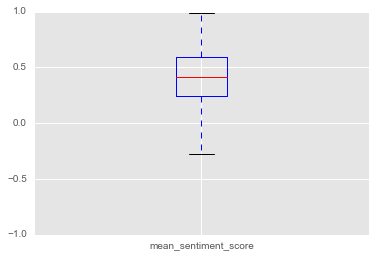

In [119]:
reviews.plot(kind='box')